In [324]:
%matplotlib widget

import sys
sys.path.append('src/')

import numpy as np
import matplotlib.pyplot as plt

## Useful constants

In [325]:
pi      = np.pi
deg2rad = pi / 180.0
rad2deg = 180.0 / pi

min2rad = deg2rad / 60.0
rad2min = rad2deg * 60.0

sec2rad = min2rad / 60.0
rad2sec = rad2min * 60.0

G = 6.67430e-11 # N m^2 kg^-2

## Parameters of the Earth

In [326]:
M  = 5.972e24  # Earth Mass [kg]
R  = 6371008.0 # Mean Earth radius [m]
mu = G * M

## Orbit parameters

In [327]:
h_min = 400.0   * 1e3 # minimum orbit altitude
h_max = 60.0    * R   # maximum orbit altitude

n_pts = 1000 # number of points
h     = np.linspace(h_min, h_max, n_pts) # altitude of the final orbit

## Computing Delta V and time of flight for Hohmann transfer

In [328]:
r1 = R + h_min # radius of the initial orbit
r2 = R + h     # radius of the final orbit

v1 = np.sqrt(mu / r1) # initial orbital velocity
v2 = np.sqrt(mu / r2) # final orbital velocity

dv1 = v1 * (np.sqrt(2 * r2 / (r1 + r2)) - 1) # first Delta V for Hohmann transfer
dv2 = v2 * (1 - np.sqrt(2 * r1 / (r1 + r2))) # second Delta V for Hohmann transfer
dvt = dv1 + dv2 # total Delta V for Hohmann transfer

T1  = 2 * pi * r1 / v1 # orbital period of the initial orbit

# time of flight for Hohmann transfer
tof_hohmann = pi * np.sqrt( ((0.5 * (r1 + r2)) ** 3) / mu)

#### Plot Delta V for Hohmann transfer

Text(0, 0.5, '$\\Delta v$ [km/s]')

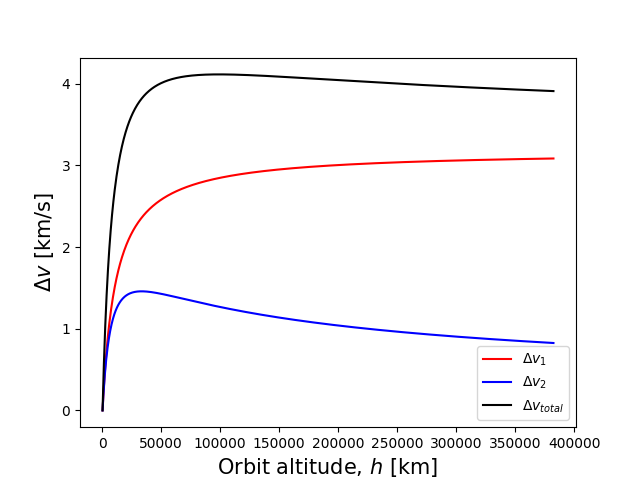

In [329]:
plt.figure()
plt.plot(h * 1e-3, dv1 * 1e-3,'-r',label=r'$\Delta v_1$')
plt.plot(h * 1e-3, dv2 * 1e-3,'-b',label=r'$\Delta v_2$')
plt.plot(h * 1e-3, dvt * 1e-3,'-k',label=r'$\Delta v_{total}$')
plt.legend()

plt.xlabel(r'Orbit altitude, $h$ [km]',fontsize=15)
plt.ylabel(r'$\Delta v$ [km/s]',fontsize=15)

In [330]:
#### Plot time of flight for Hohmann transfer

Text(0, 0.5, 'Time of flight [h]')

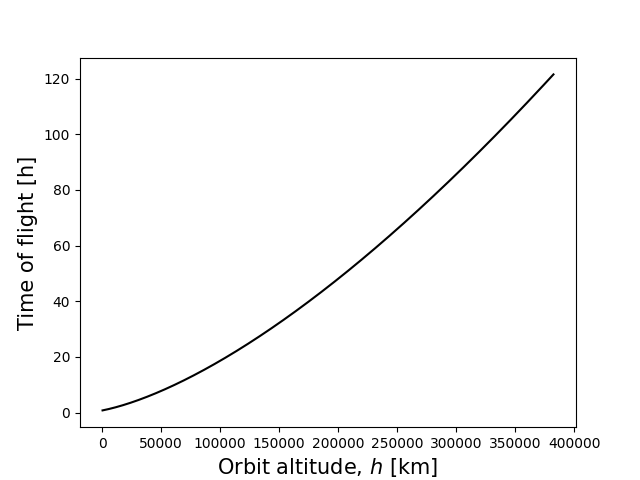

In [331]:
plt.figure()
plt.plot(h * 1e-3, tof_hohmann / 3600.0,'-k')
plt.xlabel(r'Orbit altitude, $h$ [km]',fontsize=15)
plt.ylabel(r'Time of flight [h]',fontsize=15)

## Bi-elliptic transfer

#### Let's make a function that computes both total Delta V and time of flight for the bi-elliptic transfer

In [332]:
def bielliptic_transfer(r1,r2,rb,mu):
    # Inputs:
    # r1 - initial orbit radius
    # r2 - final orbit radius
    # rb - pericenter distance of the first transfer orbit
    # mu - gravitational parameter (G*M)

    # Outputs:
    # dv_total - total Delta V
    # tof      - time of flights
    
    # compute semimajor axes of transfer orbits
    a1 = 0.5 * (r1 + rb)
    a2 = 0.5 * (r2 + rb)

    # compute delta v's
    dv1 = np.sqrt(2 * mu / r1 - mu / a1) - np.sqrt(mu / r1)
    dv2 = np.sqrt(2 * mu / rb - mu / a2) - np.sqrt(2 * mu / rb - mu / a1) 
    dv3 = np.sqrt(2 * mu / r2 - mu / a2) - np.sqrt(mu / r2)
    
    dv_total = np.abs(dv1) + np.abs(dv2) + np.abs(dv3)

    # compute time of flight
    t1  = pi * np.sqrt(a1 ** 3 / mu)
    t2  = pi * np.sqrt(a2 ** 3 / mu)
    tof = t1 + t2

    # output Delta Vs and time of flight
    return dv_total, tof

#### Choose a range of transfer orbit apocenter distances $r_b$

In [333]:
# try a range of ratios rb / r1
alpha = np.array([5, 10, 15.58, 20, 50, 100, np.inf])
rb    = r1 * alpha # pericenter distance of the first transfer orbit

#### Compute total Delta V and time of flight for the bi-elliptic transfer

In [334]:
# initialize the arrays
dv_total_bielliptic = np.zeros((len(r2),len(alpha)))
tof_bielliptic      = np.zeros((len(r2),len(alpha)))

# compute Delta V and time of flight
for i in range(len(alpha)):
    dv_total_bielliptic[:,i], tof_bielliptic[:,i] = bielliptic_transfer(r1, r2, rb[i], mu)

#### Plot total Delta V for bi-elliptic transfer 

Text(0, 0.5, '$\\Delta v / v_{1}$')

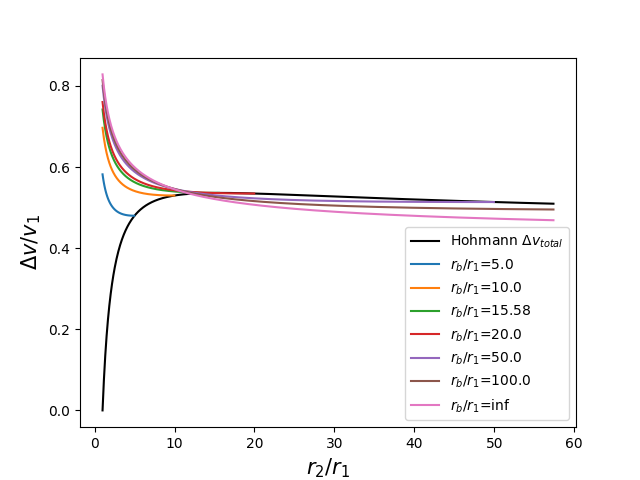

In [335]:
plt.figure()
plt.plot(r2 / r1, dvt / v1,'-k',label=r'Hohmann $\Delta v_{total}$')

for i in range(len(alpha)):
    rb    = r1 * alpha[i]
    mask  = rb > r2 # rb has to be larger than r2 for the bi-elliptic transfer
    plt.plot(r2[mask] / r1, dv_total_bielliptic[mask,i] / v1,'-',label = r'$r_b/r_1$=' + str(alpha[i]))
    
plt.legend()
plt.xlabel(r'$r_{2} / r_{1}$',fontsize=15)
plt.ylabel(r'$\Delta v / v_{1}$',fontsize=15)

#### Plot time of flight for bi-elliptic transfer in comparison to Hohmann transfer 

Text(0, 0.5, '$\\frac{T_{bi-elliptic}}{T_{Hohmann}}$')

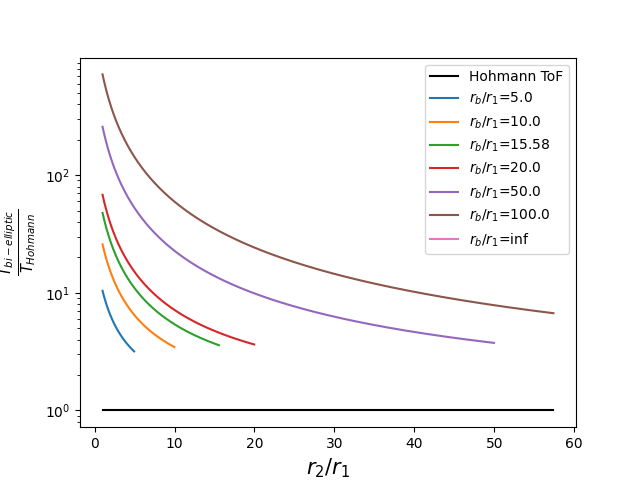

In [336]:
fig, ax = plt.subplots()
ax.set_yscale('log')

plt.plot(r2 / r1, tof_hohmann / tof_hohmann,'-k',label=r'Hohmann ToF')

for i in range(len(alpha)):
    rb    = r1 * alpha[i]
    mask  = rb > r2
    plt.plot(r2[mask] / r1, tof_bielliptic[mask,i] / tof_hohmann[mask],'-',label = r'$r_b/r_1$=' + str(alpha[i]))
    
plt.legend()
plt.xlabel(r'$r_{2} / r_{1}$',fontsize=15)
plt.ylabel(r'$\frac{T_{bi-elliptic}}{T_{Hohmann}}$',fontsize=15)

#### Now, let's zoom in between $r_2/r_1 = 11$ and $r_2/r_1 = 21$ for the Delta V plot

(0.52, 0.545)

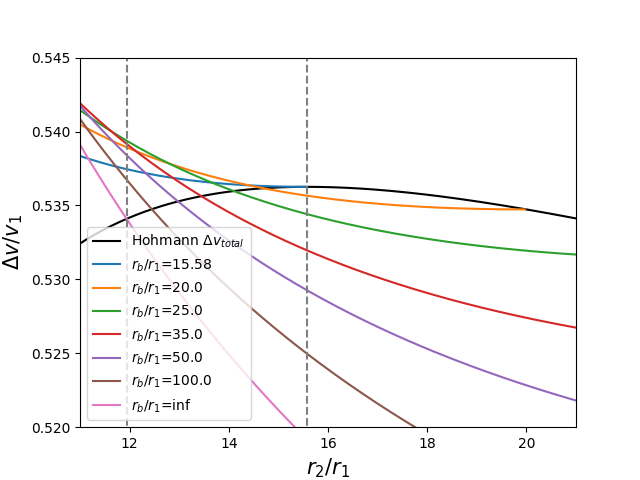

In [337]:
alpha               = np.array([15.58, 20, 25, 35, 50, 100, np.inf])
rb                  = r1 * alpha
dv_total_bielliptic = np.zeros((len(r2),len(alpha)))

for i in range(len(alpha)):
    dv_total_bielliptic[:,i], _ = bielliptic_transfer(r1, r2, rb[i], mu)

plt.figure()
plt.plot(r2 / r1, dvt / v1,'-k',label=r'Hohmann $\Delta v_{total}$')

for i in range(len(alpha)):
    rb    = r1 * alpha[i]
    mask  = rb > r2 # rb has to be larger than r2 for the bi-elliptic transfer
    plt.plot(r2[mask] / r1, dv_total_bielliptic[mask,i] / v1,'-',label = r'$r_b/r_1$=' + str(alpha[i]))

plt.plot(np.array([11.94, 11.94]),np.array([0, 1]),'--',color='grey')
plt.plot(np.array([15.58, 15.58]),np.array([0, 1]),'--',color='grey')

plt.legend()
plt.xlabel(r'$r_{2} / r_{1}$',fontsize=15)
plt.ylabel(r'$\Delta v / v_{1}$',fontsize=15)
plt.xlim((11,21))
plt.ylim((0.52,0.545))

####  Same as above but bi-elliptic transfer Delta V is referenced to the Hohmann Delta V

/var/folders/lp/nzbfjgh14nv_gzpg4ygpc3_m0000gn/T/ipykernel_20308/3287662566.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r2[mask] / r1, (dv_total_bielliptic[mask,i] - dvt[mask]) / dvt[mask] * 100.0,'-',label = r'$r_b/r_1$=' + str(alpha[i]))


(-10.0, 2.5)

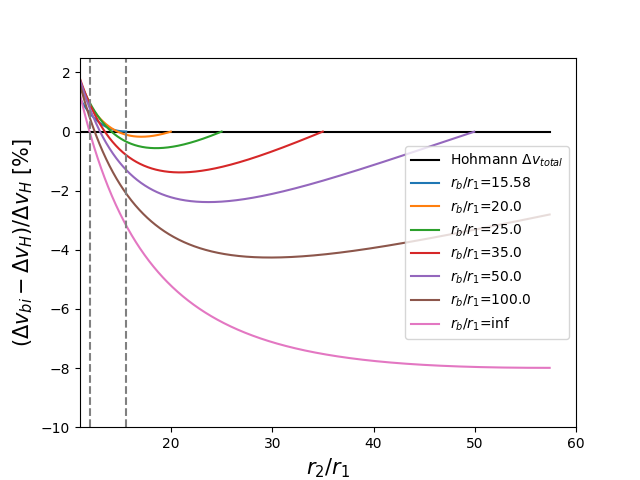

In [338]:
alpha               = np.array([15.58, 20, 25, 35, 50, 100, np.inf])
rb                  = r1 * alpha
dv_total_bielliptic = np.zeros((len(r2),len(alpha)))

for i in range(len(alpha)):
    dv_total_bielliptic[:,i], _ = bielliptic_transfer(r1, r2, rb[i], mu)

plt.figure()
plt.plot(r2 / r1, dvt * 0.0,'-k',label=r'Hohmann $\Delta v_{total}$')

for i in range(len(alpha)):
    rb    = r1 * alpha[i]
    mask  = rb > r2 # rb has to be larger than r2 for the bi-elliptic transfer
    plt.plot(r2[mask] / r1, (dv_total_bielliptic[mask,i] - dvt[mask]) / dvt[mask] * 100.0,'-',label = r'$r_b/r_1$=' + str(alpha[i]))

plt.plot(np.array([11.94, 11.94]),np.array([-10, 10]),'--',color='grey')
plt.plot(np.array([15.58, 15.58]),np.array([-10, 10]),'--',color='grey')

plt.legend()
plt.xlabel(r'$r_{2} / r_{1}$',fontsize=15)
plt.ylabel(r'$(\Delta v_{bi} - \Delta v_{H})/\Delta v_{H}$ [%]',fontsize=15)
plt.xlim((11,60))
plt.ylim((-10,2.5))